<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Вывод-по-исследованию-данных" data-toc-modified-id="Вывод-по-исследованию-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод по исследованию данных</a></span></li><li><span><a href="#Вопросы-к-заказчику:" data-toc-modified-id="Вопросы-к-заказчику:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вопросы к заказчику:</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-таблицы-с-температурой" data-toc-modified-id="Обработка-таблицы-с-температурой-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Обработка таблицы с температурой</a></span></li><li><span><a href="#Обработка-таблицы-данные-об-электродах" data-toc-modified-id="Обработка-таблицы-данные-об-электродах-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Обработка таблицы данные об электродах</a></span></li><li><span><a href="#Обработка-таблиц-с-материалами" data-toc-modified-id="Обработка-таблиц-с-материалами-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Обработка таблиц с материалами</a></span></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Разделение-данных-на-обучающую-и-тестовые-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовые-выборки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовые выборки</a></span></li><li><span><a href="#Обучение-модели-и-проверка-на-тестовой-выборке" data-toc-modified-id="Обучение-модели-и-проверка-на-тестовой-выборке-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Обучение модели и проверка на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Отчёт-по-проделанной-работе" data-toc-modified-id="Отчёт-по-проделанной-работе-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Отчёт по проделанной работе</a></span></li></ul></div>

<p style="font-size:200%; font-weight:bold;">Финальный проект. Промышленность</p>

# Постановка задачи

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

<font color='purpel'><b>Комментарий тимлида </b></font><br>
<font color='green'> ✔️ Хорошо, что есть цель проекта и его описание. </font>

!pip install lightgbm
!pip install xgboost
!pip install catboost

In [1]:
# импортирую библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn-pastel')
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings('ignore') #убираю варнинги

pd.options.display.max_columns = None # Убираю ограничитель столбцов

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from time import time


In [2]:
# загружаю данные
try:
    data_arc = pd.read_csv('/datasets/data_arc_new.csv')
    data_bulk = pd.read_csv('/datasets/data_bulk_new.csv')
    data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
    data_gas = pd.read_csv('/datasets/data_gas_new.csv')
    data_temp = pd.read_csv('/datasets/data_temp_new.csv')
    data_wire = pd.read_csv('/datasets/data_wire_new.csv')
    data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    data_arc = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_arc_new.csv')
    data_bulk = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_bulk_new.csv')
    data_bulk_time = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_bulk_time_new.csv')
    data_gas = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_gas_new.csv')
    data_temp = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_temp_new.csv')
    data_wire = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_wire_new.csv')
    data_wire_time = pd.read_csv('W:/Anaconda/Data Science/Final_project/data_wire_time_new.csv')   

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

# План работы

1. Провести исследовательский анализ данных.
2. Уточнить у заказчика моменты, которые вызывают вопросы
2. Провести предобработку данных с удалением аномальных значений.
3. Объединить таблицы по столбцу `key`
4. Разделить данные на обучающую и тестовые выборки
5. Обучение модели и проверка на тестовой выборке
6. Написать отчёт о проделанной работе

# Исследование данных

In [3]:
# Создам список с данными
data_list = {
            'Данные об электродах':data_arc,
            'Данные о подаче сыпучих материалов (объём)':data_bulk,
            'Данные о подаче сыпучих материалов (время)':data_bulk_time,
            'Данные о продувке сплава газом':data_gas,
            'Результаты измерения температуры':data_temp,
            'Данные о проволочных материалах (объём)':data_wire,
            'Данные о проволочных материалах (время)':data_wire_time
}

In [4]:
for data in data_list:
    print(data)
    display(data_list[data].head(15))
    display(data_list[data].info())
    print('----------------------------------------')

Данные об электродах


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

----------------------------------------
Данные о подаче сыпучих материалов (объём)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

----------------------------------------
Данные о подаче сыпучих материалов (время)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

----------------------------------------
Данные о продувке сплава газом


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

----------------------------------------
Результаты измерения температуры


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

----------------------------------------
Данные о проволочных материалах (объём)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

----------------------------------------
Данные о проволочных материалах (время)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

----------------------------------------


**Выводы по предоставленным данным**

- В датасете `data_arc_new` содержаться данные об электродах, пропусков в данных нету
- Датасеты `data_bulk_new.csv` и `data_bulk_time_new.csv` связаны и в них содержатя информация о подаче сыпучих материалов. Имеется 15 колонок с различными типами состава. Получается, производили различную комбинацию итогового состава
- Так же `data_wire` и `data_wire_time` содержат информацию об объёме и времени добавления проволочных материалов (вместо сыпучих)
- В датасете `data_gas` содержится параметры газа, который используется дя продувки смеси. Пропусков нету.
- В `data_temp` содержатся результаты измерения температуры. Это целевая метрика для обучения модели. Присутсвтуют пропуски. Строки с пропусками придётся удалить, т.к. это исказит обучение модели

**Исследуем данные**

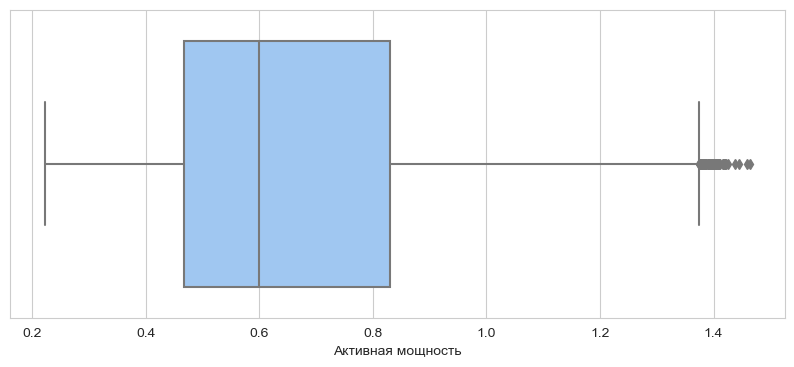

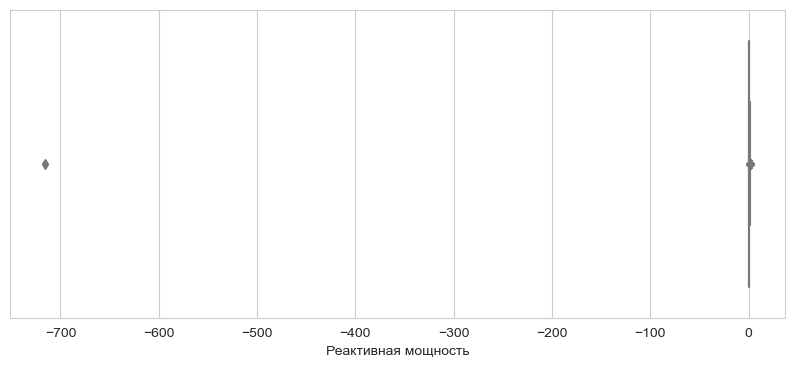

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize =(10,4))
sns.boxplot('Активная мощность', data = data_arc)
plt.show()

plt.figure(figsize =(10,4))
sns.boxplot('Реактивная мощность', data = data_arc)
plt.show()

В реактивной мощности присутствует огромный выброс, удалю его.

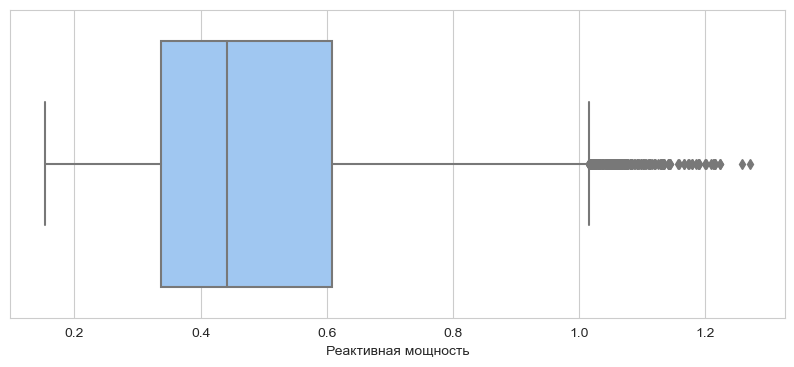

In [6]:
data_arc = data_arc[data_arc['Реактивная мощность']>=-100]
sns.set_style("whitegrid")
plt.figure(figsize =(10,4))
sns.boxplot('Реактивная мощность', data = data_arc)
plt.show()

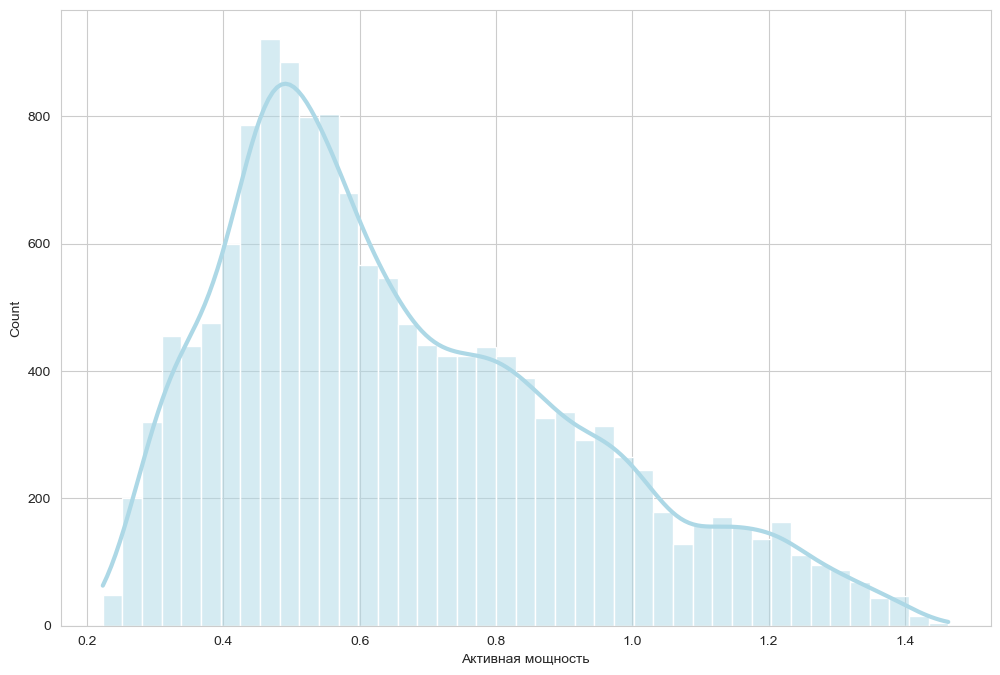

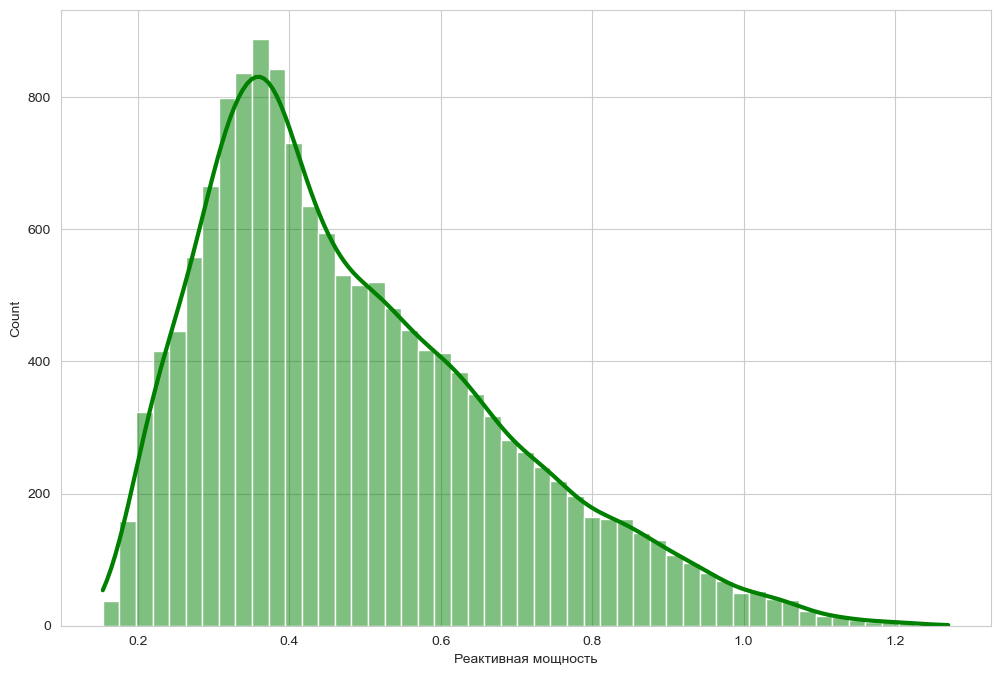

In [7]:
# Теперь можно взглянуть на плотность распределения
plt.figure(figsize=(12,8))
sns.histplot(data_arc['Активная мощность'], kde=True,color ="lightblue", line_kws = {'linewidth':3})
plt.show()

plt.figure(figsize=(12,8))
sns.histplot(data_arc['Реактивная мощность'], kde=True, color ="green", line_kws={'linewidth':3})
plt.show()

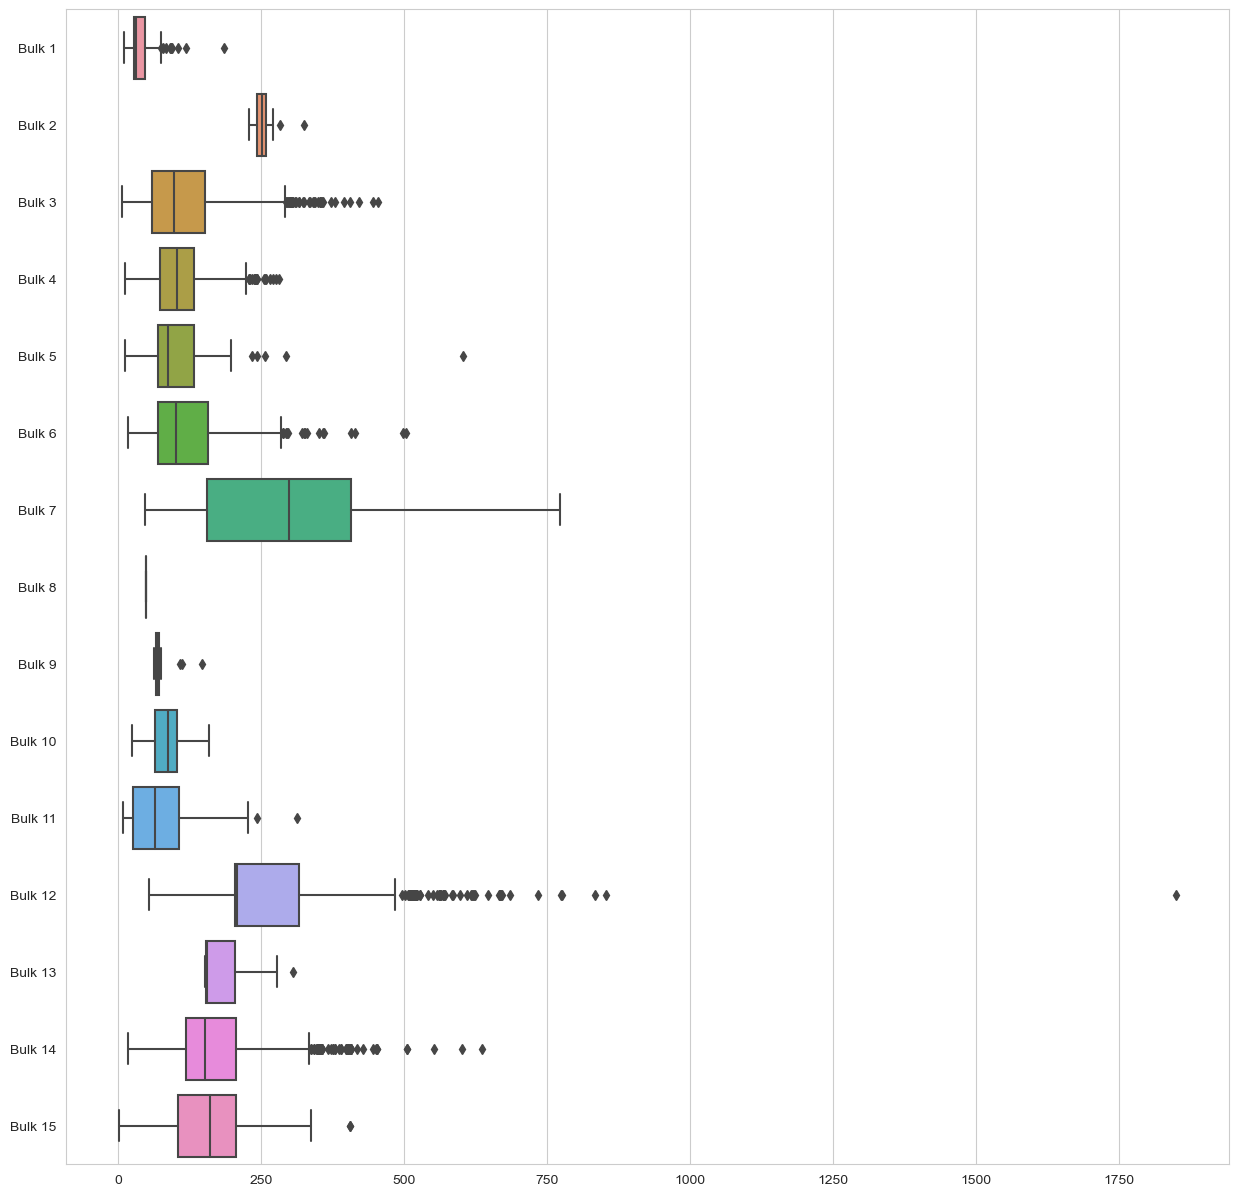

In [8]:
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")
sns.boxplot(data = data_bulk.drop('key', axis = 1), orient='h')
plt.show()

In [9]:
bulk_8 = data_bulk['Bulk 8']
bulk_8.dropna(inplace = True)
print('Кол-во значений в столбце Bulk 8:',bulk_8.count())

Кол-во значений в столбце Bulk 8: 1


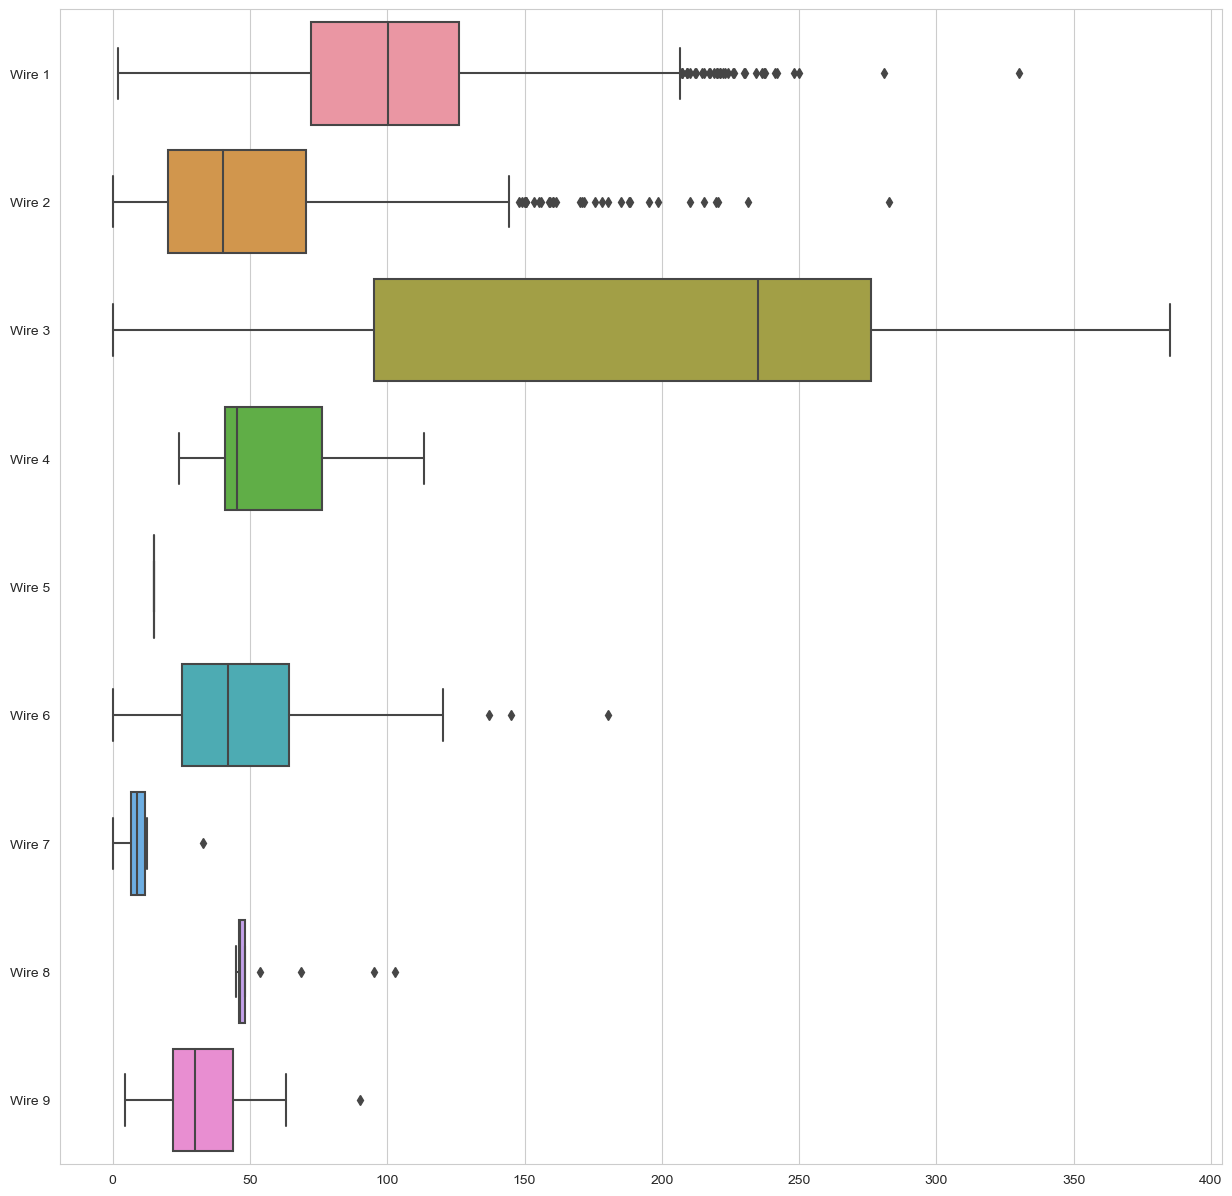

In [10]:
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")
sns.boxplot(data = data_wire.drop('key', axis = 1), orient='h')
#data_bulk.boxplot([col for col in data_bulk.columns if col != 'key'], vert=False)
plt.show()

In [11]:
wire_5 = data_wire['Wire 5']
wire_5.dropna(inplace = True)
print('Кол-во значений в столбце Wire 5:',wire_5.count())

Кол-во значений в столбце Wire 5: 1


**Продувке сплава газом**

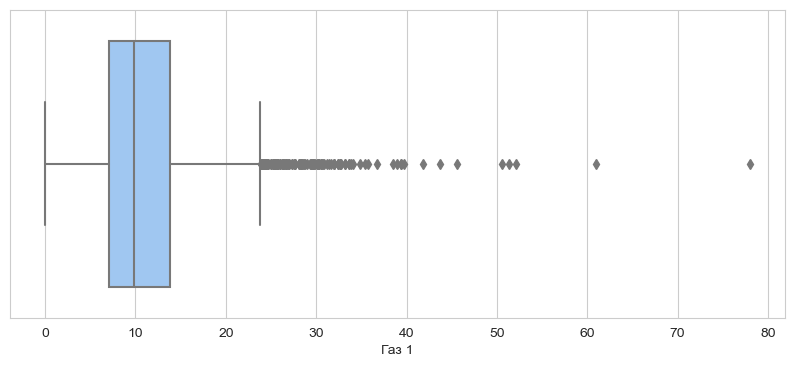

In [12]:
plt.figure(figsize =(10,4))
sns.boxplot('Газ 1', data = data_gas)
plt.show()

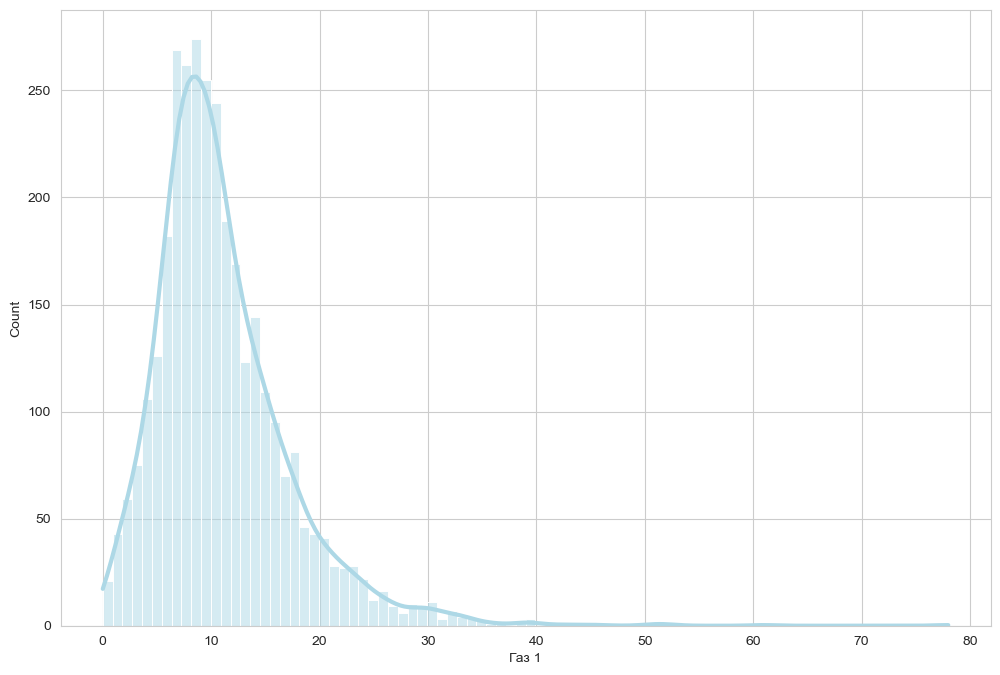

In [13]:
plt.figure(figsize=(12,8))
sns.histplot(data_gas['Газ 1'], kde=True,color ="lightblue", line_kws = {'linewidth':3})
plt.show()

**Температура**

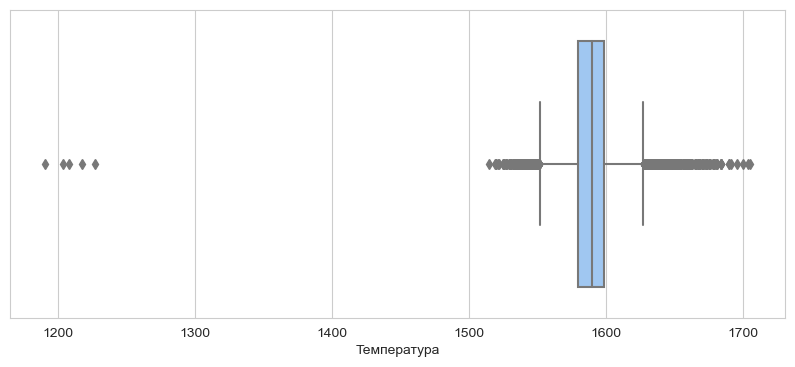

In [14]:
plt.figure(figsize =(10,4))
sns.boxplot('Температура', data = data_temp)
plt.show()

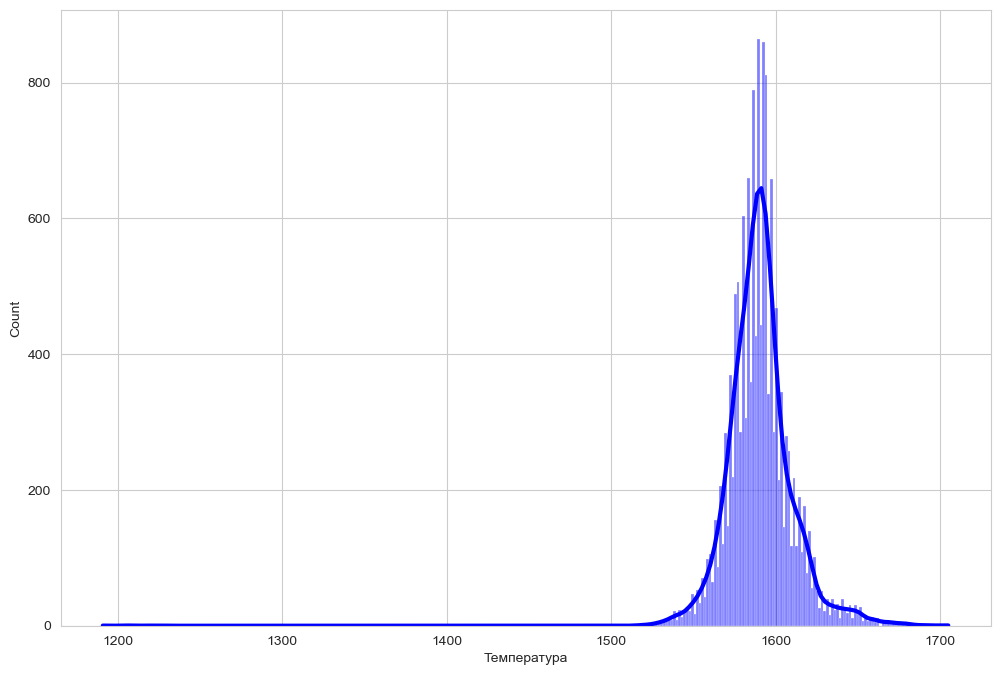

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data_temp['Температура'], kde=True,color ="blue", line_kws = {'linewidth':3})
plt.show()

# Вывод по исследованию данных

- В таблице `Данные об электродах` (data_arc) был обнаружена аномальный отрицательный выброс значение -700.
- В таблицах `Данные о подаче сыпучих материалов (объём)` (data_bulk) и `Данные о проволочных материалах (объём)` (data_wire) присутсвуют единичные значения в столбцах `Bulk 8` и `Wire 5`, так же в этих таблицах присутствуют выбросы.
- Надо заполнить пропущенные значения в таблицах с материаломи нулями, чтобы не было NaN.
- В таблице `Данные о продувке сплава газом` (data_gas) так же присутствуют выбросы, нужно понять, какой максимальный объём подавался в ковш
- В таблице `Результаты измерения температуры` (data_temp) присутсвует большой разбросс температур. Нужно уточникть у заказчика, при какой минимальеой температуре работать. Так же там есть пропуски, которые придётся удалить, т.к. этот столбец будет целевой метрикой в машинном анализе.

# Вопросы к заказчику:

1. Можно ли в таблице `Данные об электродах`(data_arc), посчитать общую мощность, т.к. у нас имеется активная и реактивные мощности?
2. Какой максимальный объём материалов добавлялся в ковш? В данных присутствуют выбросы, нужно понять как их правильно обработать
3. Какой максимальный объём газа подавался в ковш? Т.к. в данных тоже присутствуют выбросы.
4. При какой минимальной темпрературе плавится тестируемый сплав?

# Предобработка данных

После уточнения информации у заказчика, сделаю предобработку данных. Первое, что стоит сделать, это отфильтровать целевую метрику, температура. Было сказано, что минимальная температура должна быть 1500 градусов

## Обработка таблицы с температурой

In [34]:
data_temp

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


In [35]:
# предобработка датасета с температурами
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [36]:
data_temp_new = data_temp.copy()

In [37]:
data_temp_new['Время замера'] = pd.to_datetime(data_temp_new['Время замера'], format='%Y-%m-%d %H:%M:%S')

In [38]:
data_temp_last = data_temp_new.groupby('key').agg('max')['Время замера']
data_temp_last = pd.DataFrame(data_temp_last)
data_temp_last = data_temp_last.merge(data_temp_new, on='Время замера', how='left')
data_temp_last.set_axis(['time_last','key','temp_last'], axis = 'columns', inplace = True)

In [39]:
data_temp_first = data_temp_new.groupby('key').agg('min')['Время замера']
data_temp_first = pd.DataFrame(data_temp_first)
data_temp_first = data_temp_first.merge(data_temp_new, on='Время замера', how='left')
data_temp_first.set_axis(['time_first','key','temp_first'], axis = 'columns', inplace = True)

In [40]:
data_temp_merge = data_temp_first.merge(data_temp_last, on='key', how='left')
data_temp_merge = data_temp_merge.reindex(columns=['key', 'time_first', 'temp_first', 'time_last', 'temp_last'])
display(data_temp_merge.head(10))
data_temp_merge.info()

,key,time_first,temp_first,time_last,temp_last
0,1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
1,2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
2,3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
3,4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
4,5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0
5,6,2019-05-03 13:46:41,1543.0,2019-05-03 14:11:38,1596.0
6,7,2019-05-03 14:16:36,1586.0,2019-05-03 14:45:40,1599.0
7,8,2019-05-03 14:53:46,1577.0,2019-05-03 15:20:41,1598.0
8,9,2019-05-03 15:36:33,1587.0,2019-05-03 16:06:44,1592.0
9,10,2019-05-03 16:13:59,1574.0,2019-05-03 16:39:50,1593.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         3216 non-null   int64         
 1   time_first  3216 non-null   datetime64[ns]
 2   temp_first  3216 non-null   float64       
 3   time_last   3216 non-null   datetime64[ns]
 4   temp_last   2477 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 150.8 KB


In [41]:
data_temp_merge.isna().sum()

key             0
time_first      0
temp_first      0
time_last       0
temp_last     739
dtype: int64

In [42]:
# Удаляю пропуски
data_temp_merge = data_temp_merge.dropna(axis = 0).reset_index()

Посмотрю, где есть совпадающие значения температуры

In [43]:
data_temp_merge[data_temp_merge['time_first']==data_temp_merge['time_last']]

,index,key,time_first,temp_first,time_last,temp_last
192,192,195,2019-05-11 00:01:36,1583.0,2019-05-11 00:01:36,1583.0
276,276,279,2019-05-14 10:13:01,1603.0,2019-05-14 10:13:01,1603.0


В 2х строках обнаружены повтряющиеся значения, удалю их

In [44]:
same_temp_index = data_temp_merge[data_temp_merge['time_first']==data_temp_merge['time_last']].index

In [45]:
data_temp_merge = data_temp_merge.drop(same_temp_index)

Проверяю

In [46]:
data_temp_merge[data_temp_merge['time_first']==data_temp_merge['time_last']]

,index,key,time_first,temp_first,time_last,temp_last


Всё нормально, повторяющиеся значения удалены.  
Теперь рассмотрю информацию о таблице:

In [47]:
data_temp_merge.describe()

,index,key,temp_first,temp_last
count,2475.000000,2475.000000,2475.000000,2475.000000
mean,1238.811313,1250.787071,1588.402020,1595.336162
std,714.910504,719.787271,29.243044,16.023153
min,0.000000,1.000000,1191.000000,1541.000000
25%,620.500000,629.500000,1572.000000,1587.000000
50%,1239.000000,1252.000000,1588.000000,1593.000000
75%,1857.500000,1872.500000,1605.000000,1599.000000
max,2476.000000,2499.000000,1679.000000,1700.000000


В колонке `temp_first` минимальное значение температуры равно `1191`, что не удовлетворяет условию >= 1500.  
Отфильтрую по минимальной температуре:

In [48]:
data_temp_merge = data_temp_merge[data_temp_merge['temp_first'] >= 1500]

In [49]:
data_temp_merge.describe()

,index,key,temp_first,temp_last
count,2471.000000,2471.000000,2471.000000,2471.000000
mean,1238.511534,1250.484015,1589.012950,1595.339943
std,715.229420,720.109488,25.004369,16.035215
min,0.000000,1.000000,1519.000000,1541.000000
25%,619.500000,628.500000,1572.000000,1587.000000
50%,1239.000000,1252.000000,1588.000000,1593.000000
75%,1857.500000,1872.500000,1605.000000,1599.000000
max,2476.000000,2499.000000,1679.000000,1700.000000


**Итог:**  
Данные отфильтровались по минимальной температуре в 1500 градусов, так же избавились от пропусков и неизменяющихся значений температур, т.к. они бы они негативно сказались на обучении модели

In [50]:
data_temp_merge[data_temp_merge['time_first']==data_temp_merge['time_last']]

,index,key,time_first,temp_first,time_last,temp_last


## Обработка таблицы данные об электродах

In [51]:
# преобразую колонки в формат даты у датасетов data_bulk_time и data_wire_time
for col in data_bulk_time:
    if col != 'key':
        data_bulk_time[col] = pd.to_datetime(data_bulk_time[col], format='%Y-%m-%d %H:%M:%S')
        
for col in data_bulk_time:
    if col != 'key':
        data_bulk_time[col] = pd.to_datetime(data_bulk_time[col], format='%Y-%m-%d %H:%M:%S')        

В таблице `Данные об электродах` (data_arc) найду время нагрева дугой и переведу в секунды

In [52]:
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Время нагрева дугой (c)'] = data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']
data_arc['Время нагрева дугой (c)'] = data_arc['Время нагрева дугой (c)'].apply(pd.Timedelta.total_seconds).astype('int')

Найду полную мощность по формуле: 
        $$S = \sqrt{Q^2 + P^2}$$

In [53]:
# Удалю выброс
data_arc = data_arc[data_arc['Реактивная мощность']>=-100]

In [54]:
data_arc['Полная мощность'] = ((data_arc['Активная мощность'])**2 + (data_arc['Реактивная мощность'])**2)**0.5

Зная мощность, я теперь могу посчитать энергию 
        $$E = P*t$$

In [55]:
data_arc['Энергия'] = data_arc['Полная мощность'] * data_arc['Время нагрева дугой (c)']

In [56]:
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Время нагрева дугой (c),Полная мощность,Энергия
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228,0.371123,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185,0.902319,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172,0.722536,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365,0.642824,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148,1.079934,159.830252
...,...,...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,157,0.532085,83.537345
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,180,0.792429,142.637202
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,184,1.293389,237.983620
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,57,0.641792,36.582120


Оставлю только то, что понадобится во дя обучения модели

In [57]:
data_arc_new = data_arc.copy()

In [58]:
data_arc_new = data_arc_new.groupby('key').sum()[['Время нагрева дугой (c)', 'Полная мощность', 'Энергия']]
data_arc_new

,Время нагрева дугой (c),Полная мощность,Энергия
key,,,
1,1098,3.718736,770.282114
2,811,2.588349,481.760005
3,655,5.019223,722.837668
4,741,3.400038,683.455597
5,869,2.816980,512.169934
...,...,...,...
3237,909,3.250657,630.503534
3238,546,1.723937,286.052252
3239,1216,6.014480,941.538764


**Итог:**  
Было посчитано время нагрева дугой, полная мощность и энергия, созданна новая таблица содержащая данные для обучения модели

## Обработка таблиц с материалами

Изучу данные по кол-ву материалов

In [59]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [60]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [61]:
data_bulk_new = data_bulk.copy()
data_wire_new = data_wire.copy()

Количество добавляемого материала имеет большой разброс. От нескольких единиц, до нескольких тысяч. Отфильтрую данные по минимальном кол-ву добавляемого материала. Для `data_bulk` это будет `150` единиц, для `data_wire` - `50`.

Для удобства создам функцию, которая будет принимать на вход фильтруемый датасет и значение фильтра и заполнять пропущенные значения нулями

def data_filter(data, vallue, col_name):
    col_out_data = []
    for col in data:
        if data[col].isna().sum() >= (len(data) - vallue):
            col_out_data.append(col)
    data = data.drop(columns = col_out_data)
    data_column_list = data.drop(columns=['key']).columns
    data[f'{col_name}_count'] = (data[data_column_list] != 0).sum(axis=1)
    data[f'{col_name}_sum'] = (data_bulk_new[data_column_list]).sum(axis = 1)
    data= data.fillna(0)
    return data

In [62]:
def data_filter(data, vallue):
    col_out_data = []
    for col in data:
        if data[col].isna().sum() >= (len(data) - vallue):
            col_out_data.append(col)
    data = data.drop(columns = col_out_data)
    data= data.fillna(0)
    return data

In [63]:
data_bulk_new = data_filter(data_bulk_new, 150)

In [64]:
data_bulk_new

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15
0,1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0
1,2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0
2,3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0
3,4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0
4,5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,170.0,0.0,0.0,0.0,0.0,252.0,130.0,206.0
3125,3238,0.0,126.0,0.0,0.0,0.0,0.0,254.0,108.0,106.0
3126,3239,0.0,0.0,0.0,114.0,0.0,0.0,158.0,270.0,88.0
3127,3240,0.0,0.0,0.0,26.0,0.0,0.0,0.0,192.0,54.0


In [65]:
bulk_list = data_bulk_new.drop(columns ='key').columns
bulk_list

Index(['Bulk 1', 'Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 14', 'Bulk 15'],
      dtype='object')

In [66]:
data_bulk_new ['Bulk_count'] = (data_bulk_new[bulk_list] != 0).sum(axis = 1)
data_bulk_new ['Bulk_sum'] = (data_bulk_new[bulk_list]).sum(axis = 1)

In [67]:
data_bulk_new

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Bulk_count,Bulk_sum
0,1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,4,553.0
1,2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,4,582.0
2,3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,4,544.0
3,4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,4,595.0
4,5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,4,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,0.0,170.0,0.0,0.0,0.0,0.0,252.0,130.0,206.0,4,758.0
3125,3238,0.0,126.0,0.0,0.0,0.0,0.0,254.0,108.0,106.0,4,594.0
3126,3239,0.0,0.0,0.0,114.0,0.0,0.0,158.0,270.0,88.0,4,630.0
3127,3240,0.0,0.0,0.0,26.0,0.0,0.0,0.0,192.0,54.0,3,272.0


In [68]:
data_wire_new = data_filter(data_wire_new, 50)

In [69]:
wire_list = data_wire_new.drop(columns ='key').columns
wire_list

Index(['Wire 1', 'Wire 2', 'Wire 3', 'Wire 6'], dtype='object')

In [70]:
data_wire_new ['Wire_count'] = (data_wire_new[wire_list] != 0).sum(axis = 1)
data_wire_new ['Wire_sum'] = (data_wire_new[wire_list]).sum(axis = 1)

In [71]:
data_wire_new

,key,Wire 1,Wire 2,Wire 3,Wire 6,Wire_count,Wire_sum
0,1,60.059998,0.00000,0.0,0.0,1,60.059998
1,2,96.052315,0.00000,0.0,0.0,1,96.052315
2,3,91.160157,0.00000,0.0,0.0,1,91.160157
3,4,89.063515,0.00000,0.0,0.0,1,89.063515
4,5,89.238236,9.11456,0.0,0.0,2,98.352796
...,...,...,...,...,...,...,...
3076,3237,38.088959,0.00000,0.0,0.0,1,38.088959
3077,3238,56.128799,0.00000,0.0,0.0,1,56.128799
3078,3239,143.357761,0.00000,0.0,0.0,1,143.357761
3079,3240,34.070400,0.00000,0.0,0.0,1,34.070400


In [72]:
# Создам таблицу с материалами
data_materials = data_bulk_new.merge(data_wire_new, on = 'key')
data_materials

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Bulk_count,Bulk_sum,Wire 1,Wire 2,Wire 3,Wire 6,Wire_count,Wire_sum
0,1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,4,553.0,60.059998,0.00000,0.0,0.0,1,60.059998
1,2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,4,582.0,96.052315,0.00000,0.0,0.0,1,96.052315
2,3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,4,544.0,91.160157,0.00000,0.0,0.0,1,91.160157
3,4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,4,595.0,89.063515,0.00000,0.0,0.0,1,89.063515
4,5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,4,584.0,89.238236,9.11456,0.0,0.0,2,98.352796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,3237,0.0,170.0,0.0,0.0,0.0,0.0,252.0,130.0,206.0,4,758.0,38.088959,0.00000,0.0,0.0,1,38.088959
3021,3238,0.0,126.0,0.0,0.0,0.0,0.0,254.0,108.0,106.0,4,594.0,56.128799,0.00000,0.0,0.0,1,56.128799
3022,3239,0.0,0.0,0.0,114.0,0.0,0.0,158.0,270.0,88.0,4,630.0,143.357761,0.00000,0.0,0.0,1,143.357761
3023,3240,0.0,0.0,0.0,26.0,0.0,0.0,0.0,192.0,54.0,3,272.0,34.070400,0.00000,0.0,0.0,1,34.070400


In [73]:
data_materials.sort_values(by = 'Bulk_sum').head(15)

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Bulk_count,Bulk_sum,Wire 1,Wire 2,Wire 3,Wire 6,Wire_count,Wire_sum
1827,1948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,10.221120,0.000000,0.000000,0.000000,1,10.221120
2999,3215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.062240,0.000000,0.000000,0.000000,1,4.062240
2998,3214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5.023200,0.000000,0.000000,0.000000,1,5.023200
1271,1362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,19.047600,0.000000,0.000000,0.000000,1,19.047600
2996,3212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7.119840,0.000000,0.000000,0.000000,1,7.119840
1055,1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,21.668399,0.000000,0.000000,0.000000,1,21.668399
94,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7.556640,0.000000,96.047951,60.094322,3,163.698913
95,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.000000,88.648567,54.122643,2,142.771210
1825,1945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,13.104000,0.000000,0.000000,0.000000,1,13.104000
599,644,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0,105.159599,0.000000,0.000000,0.000000,1,105.159599


# Объединение таблиц

In [74]:
data_temp_merge = data_temp_merge[['key', 'temp_first', 'temp_last']]
data_temp_merge

,key,temp_first,temp_last
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2472,2495,1570.0,1591.0
2473,2496,1554.0,1591.0
2474,2497,1571.0,1589.0
2475,2498,1591.0,1594.0


In [75]:
data_merge = data_temp_merge.merge(data_materials, how='inner', on='key')

In [76]:
data_merge = data_merge.merge(data_arc_new, how = 'inner', on = 'key')
data_merge =data_merge.merge(data_gas, how = 'inner', on = 'key')

In [77]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key                      2325 non-null   int64  
 1   temp_first               2325 non-null   float64
 2   temp_last                2325 non-null   float64
 3   Bulk 1                   2325 non-null   float64
 4   Bulk 3                   2325 non-null   float64
 5   Bulk 4                   2325 non-null   float64
 6   Bulk 6                   2325 non-null   float64
 7   Bulk 10                  2325 non-null   float64
 8   Bulk 11                  2325 non-null   float64
 9   Bulk 12                  2325 non-null   float64
 10  Bulk 14                  2325 non-null   float64
 11  Bulk 15                  2325 non-null   float64
 12  Bulk_count               2325 non-null   int64  
 13  Bulk_sum                 2325 non-null   float64
 14  Wire 1                  

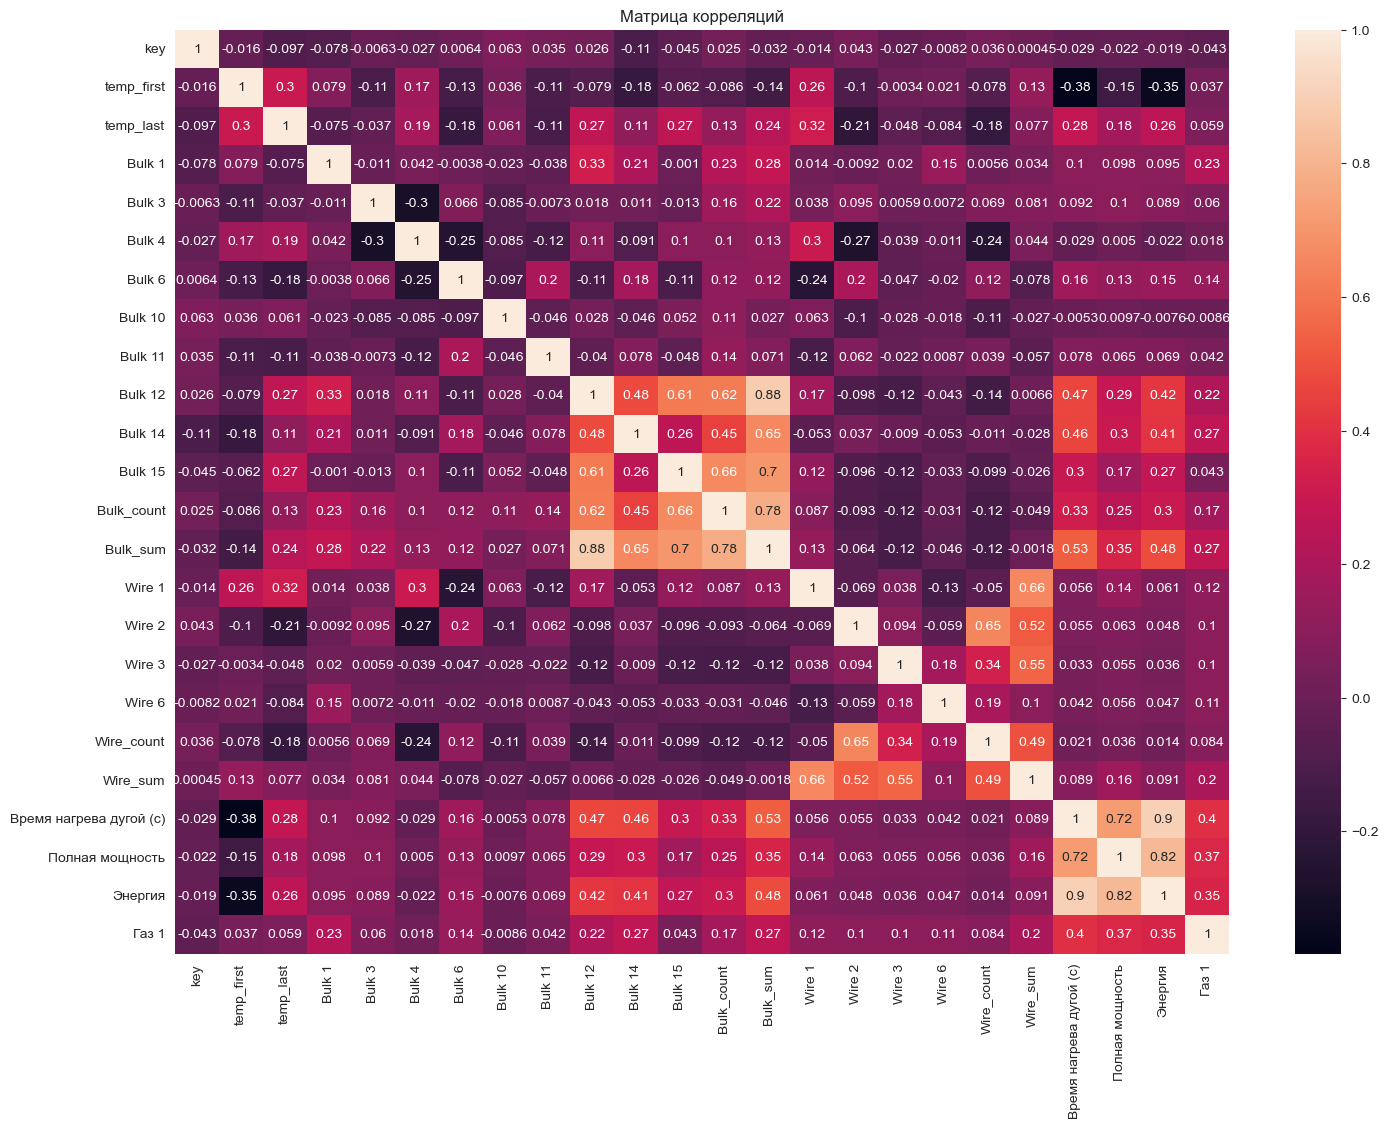

In [78]:
# Посморю зависимости
plt.figure(figsize=(17, 12))
plt.title('Матрица корреляций')

sns.heatmap(data_merge.corr(), annot = True)

plt.show()

Между параметрами `Время нагрева дугой (c)`, `Полная мощность` и `Энергия` наблюдается сильная корреляция, это может негативно отразится на модели.  
*UPD:*  После исключения этих данных из обучающей выборки, MAE увеличилась на 0.4, поэтому оставлю эти данные

**Итог:**  
Таблицы объеденины в одну `data_merge`.

# Разделение данных на обучающую и тестовые выборки

In [79]:
#Зафиксирую параметр random_state
random_state = 80523

Перемешаю данные, т.к. вначале было распределение по времени

In [80]:
data_shuffled = shuffle(data_merge, random_state=random_state)

data_shuffled.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 2030 to 281
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key                      2325 non-null   int64  
 1   temp_first               2325 non-null   float64
 2   temp_last                2325 non-null   float64
 3   Bulk 1                   2325 non-null   float64
 4   Bulk 3                   2325 non-null   float64
 5   Bulk 4                   2325 non-null   float64
 6   Bulk 6                   2325 non-null   float64
 7   Bulk 10                  2325 non-null   float64
 8   Bulk 11                  2325 non-null   float64
 9   Bulk 12                  2325 non-null   float64
 10  Bulk 14                  2325 non-null   float64
 11  Bulk 15                  2325 non-null   float64
 12  Bulk_count               2325 non-null   int64  
 13  Bulk_sum                 2325 non-null   float64
 14  Wire 1                

In [81]:
features = data_shuffled.drop(['key', 'temp_last'], axis=1)
target = data_shuffled['temp_last']

train_features, test_features, train_target, test_target = train_test_split(features, 
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=random_state)

# Обучение модели и проверка на тестовой выборке

Для выполнения поставленной задачи, воспользуюсь следующими моделями:
1. Случайный лес
2. LifgtGBM
3. XGBoost
4. CatBoost

In [82]:
# создаём таблицу для анализа
analisys = pd.DataFrame({'model':[], 'MAE_model':[]})
all_models = []


Создаю функцию для автоматизированного подбора параметров и добавления их в таблицу

In [83]:
def train_model(model, parameters):
    
    model_random = GridSearchCV(estimator=model,
                                param_grid=parameters, # используем параметры
                                scoring='neg_mean_absolute_error', # используем необходимую метрику
                                cv=3, 
                                verbose=1)

# Зафиксирую время обучения
    start = time()
    model_random.fit(train_features, train_target)
    print('GridSearchCV подбирал параметры %.2f секунд' %(time() - start))
# Считаю MAE
    mae = model_random.best_score_ * -1
    
    
    print('Лучшие параметры:', model_random.best_params_)
    print('MAE обученной модели:', mae)
    
    
# Заполнение таблицы    
    all_models.append(model_random)
    row = []
    row.extend([model, mae])
    analisys.loc[len(analisys.index)] = row
    
    return model_random

Обучаю модели

In [84]:
# Случайный лес
forest_parametrs = {
    'max_depth': list(range(2, 9)),
    'n_estimators': [50, 100, 200]
}

model_forest = RandomForestRegressor(n_jobs=-1)

model_forest_best_param = train_model(model_forest, forest_parametrs)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
GridSearchCV подбирал параметры 12.85 секунд
Лучшие параметры: {'max_depth': 8, 'n_estimators': 200}
MAE обученной модели: 6.506793473216592


In [85]:
# LifgtGBM
lgbm_parametrs = {
    'max_depth': [5, 10, 15, 25, 35],
    'learning_rate': [0.01, 0.1, 0.15]
}

gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                         objective = 'regression',
                         metric = 'RMSE')

gbm_best_param = train_model(gbm, lgbm_parametrs)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
GridSearchCV подбирал параметры 13.25 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5}
MAE обученной модели: 6.349193126692548


In [86]:
# XGBoost
xgb_parametrs = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.1, 0.15, 0.3]
}

xb = xgb.XGBRegressor(booster='gbtree', 
                      eval_metric='mae', 
                      use_rmm=True,
                     verbosity=0)

xb_best_param = train_model(xb, xgb_parametrs)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV подбирал параметры 7.63 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4}
MAE обученной модели: 6.322777647980314


In [87]:
# CatBoost
catboost_parametrs = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1]
}

cat = CatBoostRegressor(verbose=False) 

cat_best_param = train_model(cat, catboost_parametrs)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV подбирал параметры 47.29 секунд
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 6}
MAE обученной модели: 6.26280523110271


In [88]:
all_names = pd.DataFrame({'names':['RandomForest', 'LightGBM', 'XGBoost', 'CatBoost']})
analisys = pd.concat([analisys, all_names], axis=1, join='inner')
display(analisys)

,model,MAE_model,names
0,RandomForestRegressor(n_jobs=-1),6.506793,RandomForest
1,"LGBMRegressor(metric='RMSE', objective='regres...",6.349193,LightGBM
2,"XGBRegressor(base_score=None, booster='gbtree'...",6.322778,XGBoost
3,<catboost.core.CatBoostRegressor object at 0x0...,6.262805,CatBoost


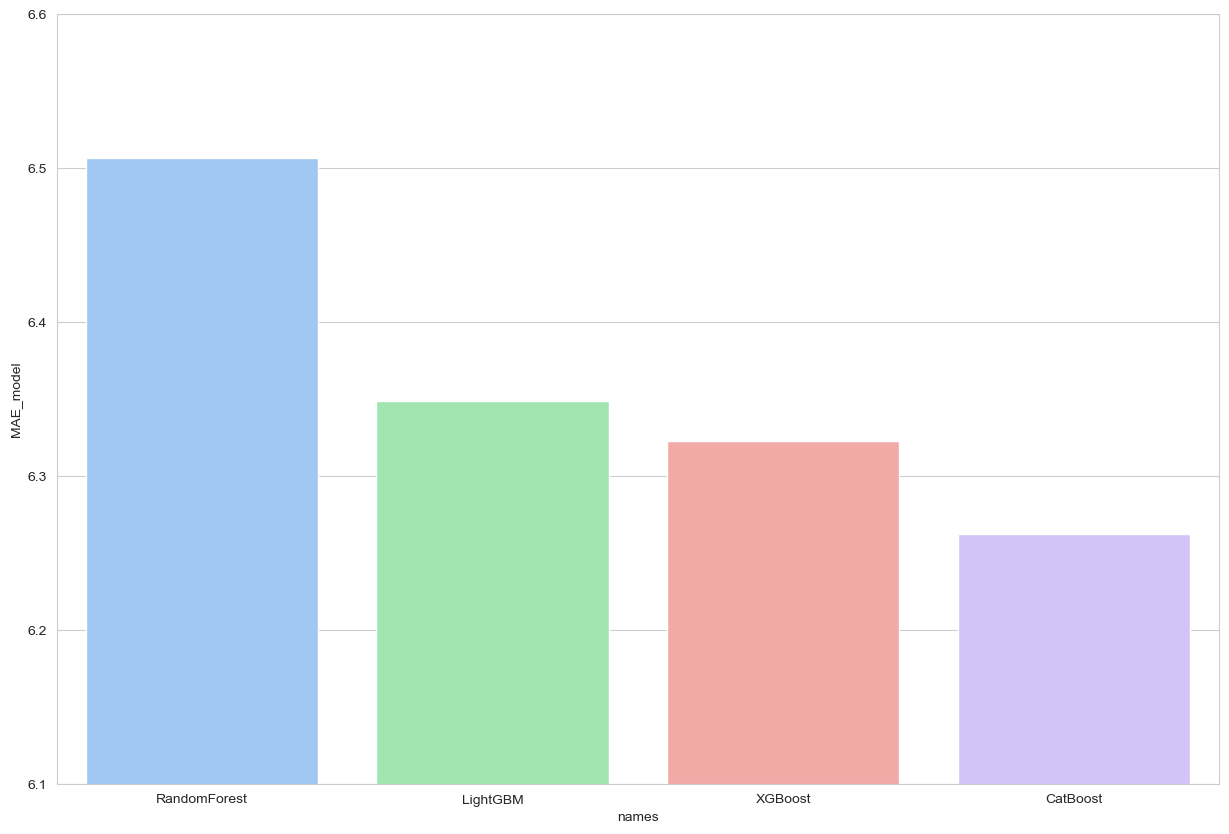

In [93]:
plt.figure(figsize=(15,10))
plot = sns.barplot(data=analisys, x="names", y= 'MAE_model').set(ylim=(6.1, 6.6))
plt.show()

**Вывод:**  
Лучшей оказалась модель `CatBoost` с параметрами 'learning_rate': 0.01 и 'max_depth': 6

# Проверка модели на тестовой выборке

In [94]:
predicted = cat_best_param.predict(test_features)
mae_on_test = mean_absolute_error(test_target, predicted)
print('MAE модели  CatBoost на тестовой выборке составила:', round(mae_on_test, 2))

MAE модели  CatBoost на тестовой выборке составила: 5.97


Text(0.5, 1.0, 'Важность параметров')

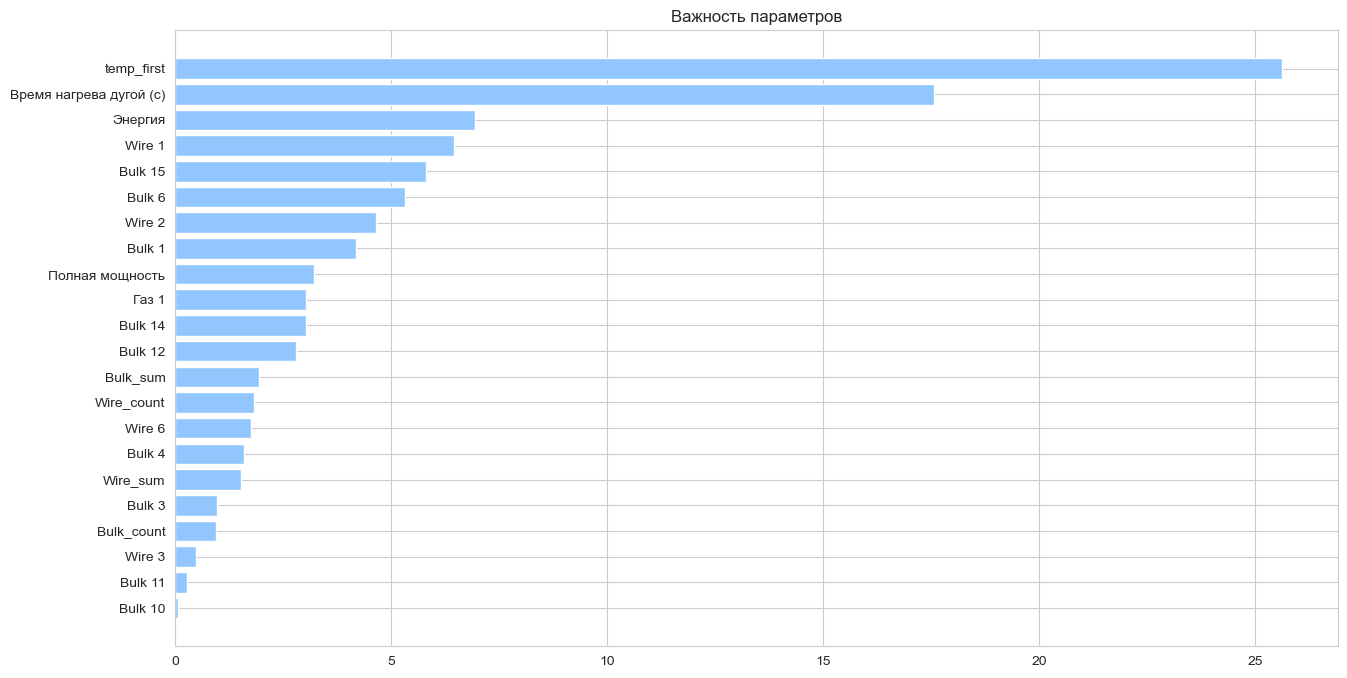

In [105]:
# Таблица важности параметров
feature_importance = cat_best_param.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(15, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_features.columns)[sorted_idx])
plt.title('Важность параметров')


**Вывод**

- `MAE` модели `CatBoost` на тестовой выборке составил `5.97` градусов, что удовлетворяет поставленому условию MAE < 6.8.
- Так же была построена таблица важности параметров, по ней можно сказать, что наибольшую важность имеет `Начальная температура`, `Время нагрева дугой` и `Энергия`. Результат логичен, т.к. чем дольше происходит нагрев и чем больше подасться мощност, тем выше будет конечная температура.

# Отчёт по проделанной работе

**1. Какие пункты плана были выполнены, а какие — нет. Почему?**  

Все пункты плана выполнены. Работа завершена

**2. Какие трудности возникли и как вы их преодолели?**  

Основная трудность, из-за большого расброса в таблицах, содержащих кол-во добавляемых веществ, было принято решение отфильровать данные, по минимальному кол-ву Bulk равном 150 единиц и Wire 50 единиц. Из-за этого не все предоставленные вещества были задействованы

**3. Какие ключевые шаги в решении задачи вы выделили?**  
- исследование данных
- предобработка 
- объединение всех данных в одну таблицу
- разделение на тренировочную и тестовую выборки
- выбор наилучшей модели
- проверка на тренеровочной выборки

**4. Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?**  
- В таблице с температурами данные были сгруппированы по столбцу key и вынесены отдельно начальное и конечное значения температур.
- Удалены строки, где были значения с пропусками
- В таблице , содержащей данные об электродах, был обнаружен и удалён выброс равный -700.
- Так же в эту таблицу были добавленны дополнительные столбцы, содержащие посчитанные полную мощность и энергию
- Так же была проведена фильтрация по минимальному значению в 1500 градусов
- В таблицах, содержащих данные про кол-во добавляемых веществ и проволок, был собнаружен сильный разброс по количеству, в итоге было принято решение отфильровать данные, по минимальному кол-ву Bulk равном 150 единиц и Wire 50 единиц. 
- В конце, все таблицы были объединены в одну, по столбцу key. 
- Наиболее значимые параметры, влияющие на конечную температуру являются `Начальная температура`, `Время нагрева дугой` и `Энергия`.

**5. Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?**  
- Лучшей модель - `CatBoost`, имеющая следующие гиперпараметры `learning_rate`: `0.01` и `max_depth`: `6`
- Итоговая `MAE` на тестовой выборке составила `5.97` градусов